# Quero Educação Challenge

### Importing libs

In [1]:
import requests
import json
import pandas as pd
import urllib3
import certifi
import psycopg2
import matplotlib.pyplot as plt
from psycopg2 import Error
from urllib3 import request
!pip install certifi

### SQL Queries

In [2]:
public_dataset_table_drop = 'DROP TABLE IF EXISTS public_dataset'

In [3]:
public_dataset_table_create = ("""
    CREATE TABLE IF NOT EXISTS public_dataset(
                                            categoria INTEGER, \
                                            cbo2002_ocupacao INTEGER, \
                                            competencia INTEGER, \
                                            fonte INTEGER, \
                                            grau_de_instrucao INTEGER, \
                                            horas_contratuais INTEGER, \
                                            id INTEGER PRIMARY KEY NOT NULL, \
                                            idade INTEGER, \
                                            ind_trab_intermitente INTEGER, \
                                            ind_trab_parcial INTEGER,  \
                                            indicador_aprendiz INTEGER, \
                                            municipio INTEGER, \
                                            raca_cor INTEGER, \
                                            regiao INTEGER, \
                                            salario DECIMAL, \
                                            saldo_movimentacao INTEGER, \
                                            secao TEXT, \
                                            sexo INTEGER, \
                                            subclasse INTEGER, \
                                            tam_estab_jan INTEGER, \
                                            tipo_de_deficiencia INTEGER, \
                                            tipo_empregador INTEGER, \
                                            tipo_estabelecimento INTEGER, \
                                            tipo_movimentacao INTEGER, \
                                            uf INTEGER \
    )
""")

In [4]:
public_dataset_table_insert = ("""
    INSERT INTO public_dataset(
                            categoria, \
                            cbo2002_ocupacao, \
                            competencia, \
                            fonte, \
                            grau_de_instrucao, \
                            horas_contratuais, \
                            id, \
                            idade, \
                            ind_trab_intermitente, \
                            ind_trab_parcial,  \
                            indicador_aprendiz, \
                            municipio, \
                            raca_cor, \
                            regiao, \
                            salario, \
                            saldo_movimentacao, \
                            secao, \
                            sexo, \
                            subclasse, \
                            tam_estab_jan, \
                            tipo_de_deficiencia, \
                            tipo_empregador, \
                            tipo_estabelecimento, \
                            tipo_movimentacao, \
                            uf)
    VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
""")

### Get data from API

In [5]:
http = urllib3.PoolManager(
       cert_reqs='CERT_REQUIRED',
       ca_certs=certifi.where())

In [6]:
url = 'http://dataeng.quero.com:5000/caged-data'

In [7]:
r = http.request('GET', url)

In [8]:
r.status

200

In [9]:
data = json.loads(r.data.decode('utf-8'))

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
# in this dataset, the data to extract is under 'caged'
df = pd.json_normalize(data, 'caged')
df.head(10)

,categoria,cbo2002_ocupacao,competencia,fonte,grau_de_instrucao,horas_contratuais,id,idade,ind_trab_intermitente,ind_trab_parcial,indicador_aprendiz,municipio,raca_cor,regiao,salario,saldo_movimentacao,secao,sexo,subclasse,tam_estab_jan,tipo_de_deficiencia,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,uf
0,101,422310,202006,1,7,36,2,18,0,0,0,355030,1,3,998,-1,N,3,8220200,7,0,0,1,40,35
1,101,521110,202006,1,7,44,3,22,0,0,0,520995,6,5,0,1,G,3,4753900,3,0,0,1,20,52
2,101,783225,202006,1,7,44,11,34,0,0,0,260890,1,2,1045,-1,C,1,2222600,2,0,0,1,31,26
3,101,848520,202006,1,4,44,12,26,0,0,0,432250,1,4,1332.880004882813,-1,C,1,1013901,6,0,0,1,43,43
4,101,521135,202006,1,6,44,13,20,0,0,0,421450,6,4,1211,-1,G,1,4520001,3,0,0,1,43,42
5,106,322205,202006,1,7,44,14,25,0,0,0,261160,1,2,1137.910034179688,-1,N,1,7820500,6,0,0,1,43,26
6,101,421125,202006,1,7,44,15,27,0,0,0,431440,2,4,1348.900024414063,-1,G,3,4711302,9,0,0,1,31,43
7,101,521115,202006,1,7,36,16,33,0,0,0,355250,6,3,1396.910034179688,-1,G,3,4752100,3,0,0,1,40,35
8,101,521110,202006,1,7,44,17,35,0,0,0,317020,6,3,643.3499755859375,1,G,1,4754703,6,0,0,1,20,31
9,101,322205,202006,1,7,36,18,35,0,0,0,350920,1,3,2113.280029296875,1,Q,1,8660700,7,0,0,1,20,35


### Removing comma from salario column to be possible change column type to integer

In [12]:
df['salario'] = df['salario'].str.replace(',', '')

### Change each column type from object to its specific data type

In [13]:
df['categoria'] = df['categoria'].astype('int')
df['cbo2002_ocupacao'] = df['cbo2002_ocupacao'].astype('int')
df['competencia'] = df['competencia'].astype('int')
df['fonte'] = df['fonte'].astype('int')
df['grau_de_instrucao'] = df['grau_de_instrucao'].astype('int')
df['horas_contratuais'] = df['horas_contratuais'].astype('int')
df['id'] = df['id'].astype('int')
df['idade'] = df['idade'].astype('int')
df['ind_trab_intermitente'] = df['ind_trab_intermitente'].astype('int')
df['ind_trab_parcial'] = df['ind_trab_parcial'].astype('int')
df['indicador_aprendiz'] = df['indicador_aprendiz'].astype('int')
df['municipio'] = df['municipio'].astype('int')
df['raca_cor'] = df['raca_cor'].astype('int')
df['regiao'] = df['regiao'].astype('int')
df['salario'] = df['salario'].astype('float')
df['saldo_movimentacao'] = df['saldo_movimentacao'].astype('int')
df['secao'] = df['secao'].astype('object')
df['sexo'] = df['sexo'].astype('int')
df['subclasse'] = df['subclasse'].astype('int')
df['tam_estab_jan'] = df['tam_estab_jan'].astype('int')
df['tipo_de_deficiencia'] = df['tipo_de_deficiencia'].astype('int')
df['tipo_empregador'] = df['tipo_empregador'].astype('int')
df['tipo_estabelecimento'] = df['tipo_estabelecimento'].astype('int')
df['tipo_movimentacao'] = df['tipo_movimentacao'].astype('int')
df['uf'] = df['uf'].astype('int')

### Reduce the decimal numbers of salario column

In [14]:
df['salario'] = df['salario'].round(decimals=3)

In [15]:
df

,categoria,cbo2002_ocupacao,competencia,fonte,grau_de_instrucao,horas_contratuais,id,idade,ind_trab_intermitente,ind_trab_parcial,indicador_aprendiz,municipio,raca_cor,regiao,salario,saldo_movimentacao,secao,sexo,subclasse,tam_estab_jan,tipo_de_deficiencia,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,uf
0,101,422310,202006,1,7,36,2,18,0,0,0,355030,1,3,998.00,-1,N,3,8220200,7,0,0,1,40,35
1,101,521110,202006,1,7,44,3,22,0,0,0,520995,6,5,0.00,1,G,3,4753900,3,0,0,1,20,52
2,101,783225,202006,1,7,44,11,34,0,0,0,260890,1,2,1045.00,-1,C,1,2222600,2,0,0,1,31,26
3,101,848520,202006,1,4,44,12,26,0,0,0,432250,1,4,1332.88,-1,C,1,1013901,6,0,0,1,43,43
4,101,521135,202006,1,6,44,13,20,0,0,0,421450,6,4,1211.00,-1,G,1,4520001,3,0,0,1,43,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22331,999,515210,202006,1,7,36,22334,25,0,0,0,354780,1,3,1455.59,1,Q,1,8610101,10,0,0,1,20,35
22332,101,521125,202006,1,7,44,22335,30,0,0,0,261160,6,2,1066.12,-1,N,1,8111700,6,0,0,1,40,26
22333,111,318705,202006,1,7,44,22336,52,1,0,0,430676,1,4,3696.00,1,C,1,2829199,1,0,0,1,20,43
22334,101,784205,202006,1,5,44,1,44,0,0,0,230370,3,2,1259.92,-1,C,1,2943300,7,0,0,1,31,23


### Count distinct values to select de columns to be used with index
* cbo2002_ocupacao
* salario
* id
* municipio
* subclasse


In [16]:
df.nunique()

categoria                    9
cbo2002_ocupacao          1181
competencia                  1
fonte                        3
grau_de_instrucao           12
horas_contratuais           61
id                       22336
idade                       67
ind_trab_intermitente        3
ind_trab_parcial             3
indicador_aprendiz           3
municipio                 2128
raca_cor                     7
regiao                       6
salario                   9283
saldo_movimentacao           2
secao                       20
sexo                         2
subclasse                  984
tam_estab_jan               11
tipo_de_deficiencia          8
tipo_empregador              3
tipo_estabelecimento         3
tipo_movimentacao           14
uf                          28
dtype: int64

### Select duplicate rows except first occurrence based on all columns

* There isn't any duplicate row to be removed

In [17]:
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are:")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are:
Empty DataFrame
Columns: [categoria, cbo2002_ocupacao, competencia, fonte, grau_de_instrucao, horas_contratuais, id, idade, ind_trab_intermitente, ind_trab_parcial, indicador_aprendiz, municipio, raca_cor, regiao, salario, saldo_movimentacao, secao, sexo, subclasse, tam_estab_jan, tipo_de_deficiencia, tipo_empregador, tipo_estabelecimento, tipo_movimentacao, uf]
Index: []


### Visualizing some non categorical data statistics to identify outliers

In [18]:
df[['horas_contratuais', 'idade', 'salario']].describe()

,horas_contratuais,idade,salario
count,22336.000000,22336.000000,2.233600e+04
mean,40.926218,33.071812,3.040481e+03
std,9.873161,11.185712,3.063214e+04
min,0.000000,14.000000,0.000000e+00
25%,44.000000,24.000000,1.145000e+03
50%,44.000000,31.000000,1.359670e+03
75%,44.000000,40.000000,1.742822e+03
max,99.000000,81.000000,2.904000e+06


### Identifying outliers in uf column 

* There are 11 outliers that need to be removed

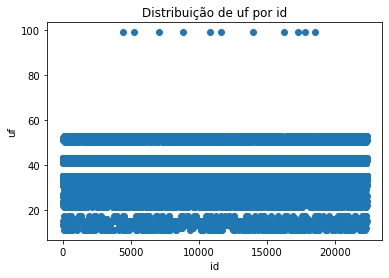

In [19]:
# Create scatter plot
plt.scatter(x = 'id', y = 'uf', data = df)
# Create title, xlabel and ylabel
plt.title('Distribuição de uf por id')
plt.xlabel('id')
plt.ylabel('uf')
# Show plot
plt.show()

### Removing outliers in uf column

In [20]:
indexNames = df[df['uf'] == 99].index
df.drop(indexNames, inplace=True)

### Identifying outliers in salario column 

* There is 1 outlier that need to be removed.

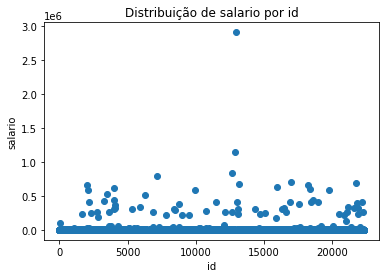

In [21]:
# Create scatter plot
plt.scatter(x = 'id', y = 'salario', data = df)
# Create title, xlabel and ylabel
plt.title('Distribuição de salario por id')
plt.xlabel('id')
plt.ylabel('salario')
# Show plot
plt.show()

### Removing outliers in salario column 

In [22]:
indexNames = df[df['salario'] > 1.5e+06].index
df.drop(indexNames, inplace=True)

### Identifying outliers in horas_contratuais

* There are  a lot of values bigger than the median but in this case, I believe that aren't outliers.

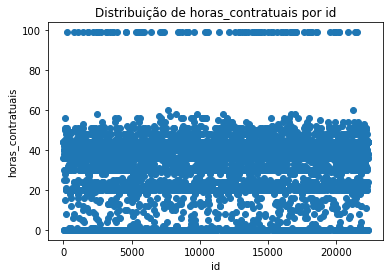

In [23]:
# Create scatter plot
plt.scatter(x = 'id', y = 'horas_contratuais', data = df)
# Create title, xlabel and ylabel
plt.title('Distribuição de horas_contratuais por id')
plt.xlabel('id')
plt.ylabel('horas_contratuais')
# Show plot
plt.show()

### Identifying missing values

* There aren't any missing values

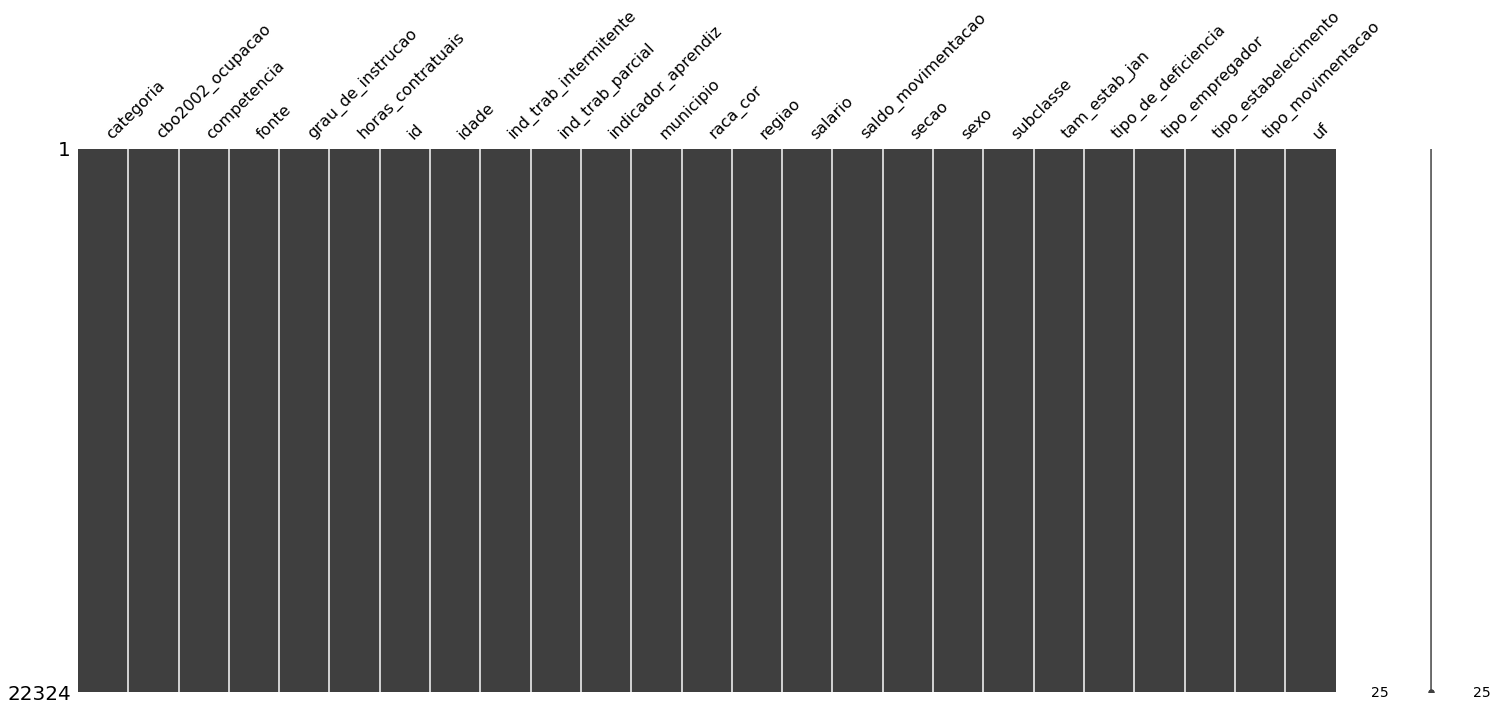

In [24]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

### Transforming df to list to be inserted in table database

In [25]:
df = pd.DataFrame(df)
df = df.values.tolist()
df 

[[101,
  422310,
  202006,
  1,
  7,
  36,
  2,
  18,
  0,
  0,
  0,
  355030,
  1,
  3,
  998.0,
  -1,
  'N',
  3,
  8220200,
  7,
  0,
  0,
  1,
  40,
  35],
 [101,
  521110,
  202006,
  1,
  7,
  44,
  3,
  22,
  0,
  0,
  0,
  520995,
  6,
  5,
  0.0,
  1,
  'G',
  3,
  4753900,
  3,
  0,
  0,
  1,
  20,
  52],
 [101,
  783225,
  202006,
  1,
  7,
  44,
  11,
  34,
  0,
  0,
  0,
  260890,
  1,
  2,
  1045.0,
  -1,
  'C',
  1,
  2222600,
  2,
  0,
  0,
  1,
  31,
  26],
 [101,
  848520,
  202006,
  1,
  4,
  44,
  12,
  26,
  0,
  0,
  0,
  432250,
  1,
  4,
  1332.88,
  -1,
  'C',
  1,
  1013901,
  6,
  0,
  0,
  1,
  43,
  43],
 [101,
  521135,
  202006,
  1,
  6,
  44,
  13,
  20,
  0,
  0,
  0,
  421450,
  6,
  4,
  1211.0,
  -1,
  'G',
  1,
  4520001,
  3,
  0,
  0,
  1,
  43,
  42],
 [106,
  322205,
  202006,
  1,
  7,
  44,
  14,
  25,
  0,
  0,
  0,
  261160,
  1,
  2,
  1137.91,
  -1,
  'N',
  1,
  7820500,
  6,
  0,
  0,
  1,
  43,
  26],
 [101,
  421125,
  202006,
  1,
 

## Creating table in Postgres database and inserting data

### Creating drop table function 

In [26]:
def droping_table():
    try:
        conn = psycopg2.connect(user='postgres',
                                password='postgres',
                                host = '127.0.0.1',
                                port = '5432',
                                database = 'postgres')
        cur = conn.cursor()
        cur.execute(public_dataset_table_drop)
        conn.commit()
        print("Table dropped successfully in PostgreSQL")

    except (Exception, psycopg2.DatabaseError) as error:
        print('Error while droping PostgreSQL table', error) 

    finally:
        if(conn):
            cur.close()
            conn.close()
            print('PostgreSQL connection is closed')

In [27]:
droping_table()

Table dropped successfully in PostgreSQL
PostgreSQL connection is closed


### Creating create table function

In [28]:
def creating_table():
    try:
        conn = psycopg2.connect(user='postgres',
                                password='postgres',
                                host = '127.0.0.1',
                                port = '5432',
                                database = 'postgres')
        cur = conn.cursor()
        cur.execute(public_dataset_table_create)
        conn.commit()
        print("Table created successfully in PostgreSQL")

    except (Exception, psycopg2.DatabaseError) as error:
        print('Error while creating PostgreSQL table', error) 

    finally:
        if(conn):
            cur.close()
            conn.close()
            print('PostgreSQL connection is closed')

In [29]:
creating_table()

Table created successfully in PostgreSQL
PostgreSQL connection is closed


### Creating insert table function

In [30]:
def inserting_data_table():
    try:
        conn = psycopg2.connect(user='postgres',
                        password='postgres',
                        host = '127.0.0.1',
                        port = '5432',
                        database = 'postgres')
        cur = conn.cursor()
        cur.executemany(public_dataset_table_insert, df)
        conn.commit()

        print('Data was inserted sucessfully')
        
    except (Exception, psycopg2.Error) as error:
        print('Error while inserting data:', error)
        
    finally:
        # closing database connection
        if(conn):
            cur.close()
            conn.close()
            print('PostgreSQL connection is closed')

In [31]:
inserting_data_table()

Data was inserted sucessfully
PostgreSQL connection is closed


### Creating index

In [32]:
def creating_index():
    try:
        conn = psycopg2.connect(user='postgres',
                        password='postgres',
                        host = '127.0.0.1',
                        port = '5432',
                        database = 'postgres')
        cur = conn.cursor()
        
        index_columns = ['cbo2002_ocupacao', 'salario', 'municipio', 'subclasse']
        for index_column in index_columns:
            index_query = f"""
            CREATE INDEX idx_{index_column} 
            ON public_dataset({index_column});
            """
            cur.execute(index_query)
            conn.commit()
            print(f'Index idx_{index_column} created sucessfully')
        
    except (Exception, psycopg2.Error) as error:
        print('Error while creating index:', error)
        
    finally:
        # closing database connection
        if(conn):
            cur.close()
            conn.close()
            print('PostgreSQL connection is closed')

In [33]:
creating_index()

Index idx_cbo2002_ocupacao created sucessfully
Index idx_salario created sucessfully
Index idx_municipio created sucessfully
Index idx_subclasse created sucessfully
PostgreSQL connection is closed
